# Predicting Blood Glucose Level - Dataset Description

## Introduction

This Jupyter Notebook aims to predict blood glucose levels in individuals using a dataset containing various health-related attributes. Predicting blood glucose levels is of paramount importance in managing and preventing diabetes, a chronic medical condition characterized by elevated blood glucose levels. Accurate predictions can aid healthcare professionals and patients in making informed decisions regarding treatment and lifestyle modifications.

## Dataset Description

The dataset used for this predictive modeling task consists of the following attributes:

1. **Pregnancies:** The number of times the individual has been pregnant.
2. **Glucose:** The plasma glucose concentration in a 2-hour oral glucose tolerance test.
3. **Diastolic:** Diastolic blood pressure (mm Hg).
4. **Triceps:** Triceps skinfold thickness (mm).
5. **Insulin:** 2-hour serum insulin (mu U/ml).
6. **BMI:** Body mass index (weight in kg / (height in m)^2).
7. **DPF (Diabetes Pedigree Function):** A function that scores the likelihood of diabetes based on family history.
8. **Age:** Age in years.
9. **Diabetes:** A binary variable (1 for diabetic, 0 for non-diabetic) indicating whether the individual has diabetes.

## Data Sample

Here's a sample of the dataset:

| Pregnancies | Glucose | Diastolic | Triceps | Insulin | BMI  | DPF   | Age | Diabetes |
|-------------|---------|-----------|---------|---------|------|-------|-----|----------|
| 6           | 148     | 72        | 35      | 0       | 33.6 | 0.627 | 50  | 1        |
| 1           | 85      | 66        | 29      | 0       | 26.6 | 0.351 | 31  | 0        |
| 8           | 183     | 64        | 0       | 0       | 23.3 | 0.672 | 32  | 1        |
| 1           | 89      | 66        | 23      | 94      | 28.1 | 0.167 | 21  | 0        |
| 0           | 137     | 40        | 35      | 168     | 43.1 | 2.288 | 33  | 1        |
| 5           | 116     | 74        | 0       | 0       | 25.6 | 0.201 | 30  | 0        |
| 3           | 78      | 50        | 32      | 88      | 31   | 0.248 | 26  | 1        |
| 10          | 115     | 0         | 0       | 0       | 35.3 | 0.134 | 29  | 0        |
| 2           | 197     | 70        | 45      | 543     | 30.5 | 0.158 | 53  | 1        |
| 8           | 125     | 96        | 0       | 0       | 37.6 | 0.191 | 30  | 0        |

This dataset provides valuable information about individuals' health and their diabetes status. The goal is to build a predictive model that can accurately predict blood glucose levels based on these attributes, contributing to better diabetes management and healthcare decision-making.

Please follow along with the code and analysis in this notebook to understand the process of building and evaluating the predictive model for blood glucose level prediction.


In [1]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define a custom style
custom_style = {
    'axes.facecolor': 'lightgray',  # Background color for the plot area
    'grid.color': 'white',         # Color of grid lines
    'axes.edgecolor': 'black',     # Color of axes edges
    'xtick.color': 'black',        # Color of x-axis ticks
    'ytick.color': 'black',        # Color of y-axis ticks
}

# Apply the custom style
sns.set(style='whitegrid', rc=custom_style)

In [3]:
# Load data
df = pd.read_csv('data/diabetes_clean.csv')
df.shape

(768, 9)

In [4]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Missing Value Treatment

In [7]:
from toolkit import visualize_missing_data

(CVXPY) Sep 27 09:53:28 PM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Sep 27 09:53:28 PM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Sep 27 09:53:28 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: The specified module could not be found.')


Missing Data Information


,Total Missing,Percent Missing



Numerical Feature Analysis

Feature: pregnancies
All entries are numeric.

Feature: glucose
All entries are numeric.

Feature: diastolic
All entries are numeric.

Feature: triceps
All entries are numeric.

Feature: insulin
All entries are numeric.

Feature: bmi
All entries are numeric.

Feature: dpf
All entries are numeric.

Feature: age
All entries are numeric.

Feature: diabetes
All entries are numeric.


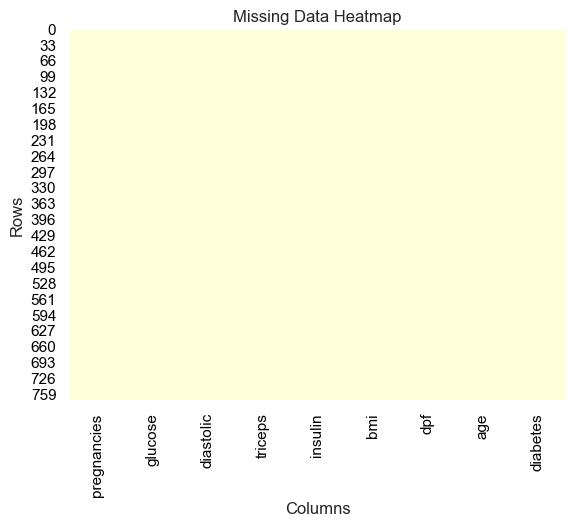

In [8]:
visualize_missing_data(df)

## EDA

In [9]:
from toolkit import histogram_plots

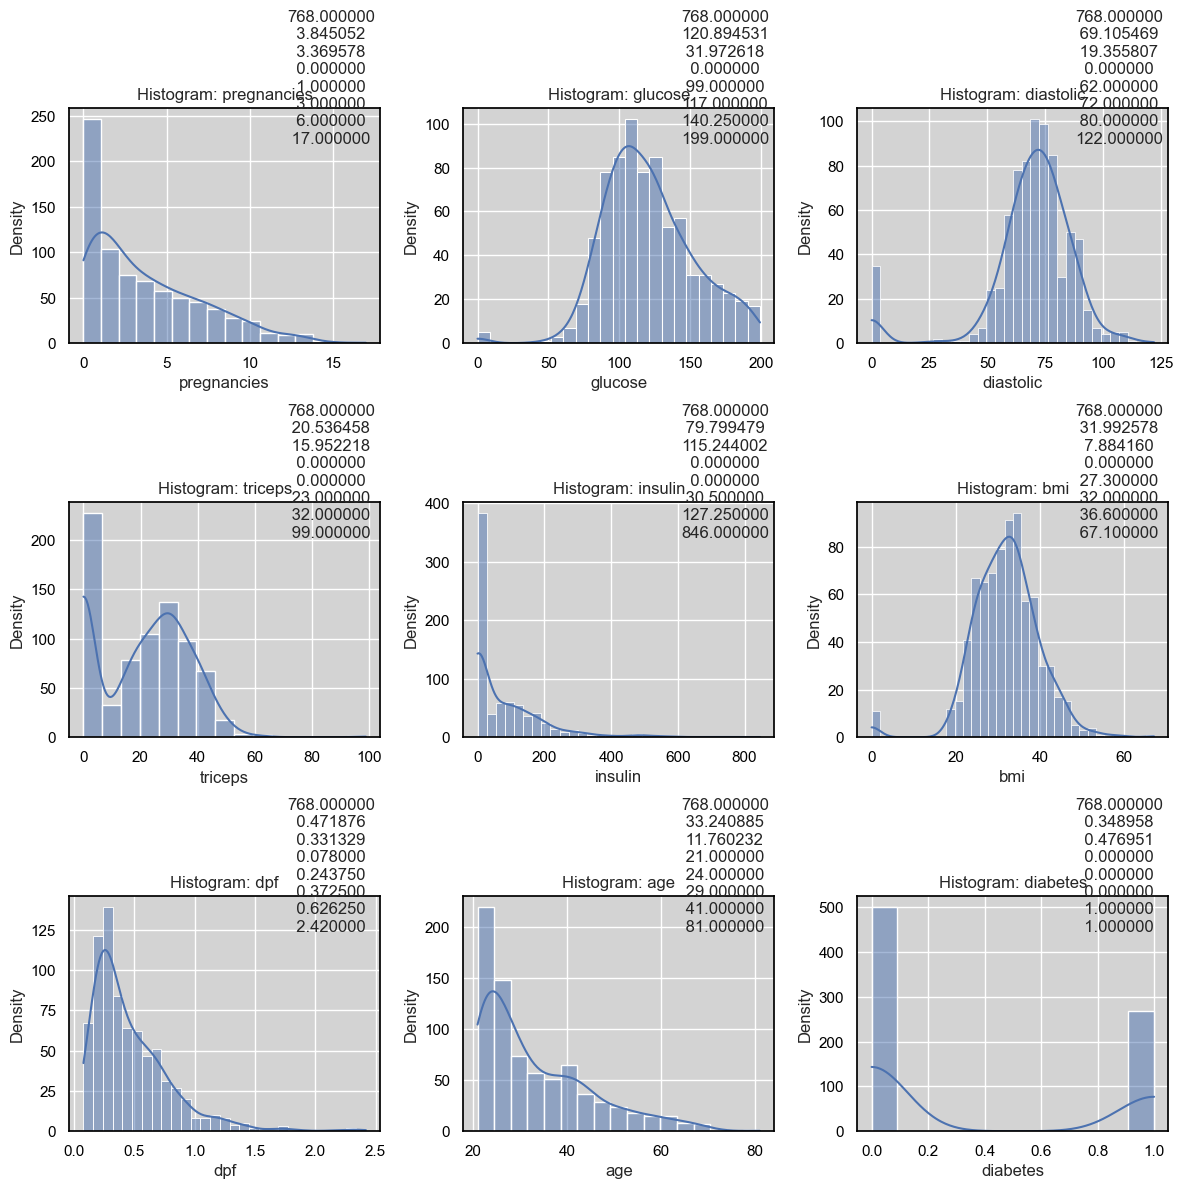

In [10]:
# Plot histograms
histogram_plots(df, plots_per_row=3)

In [11]:
from toolkit import scatter_plots

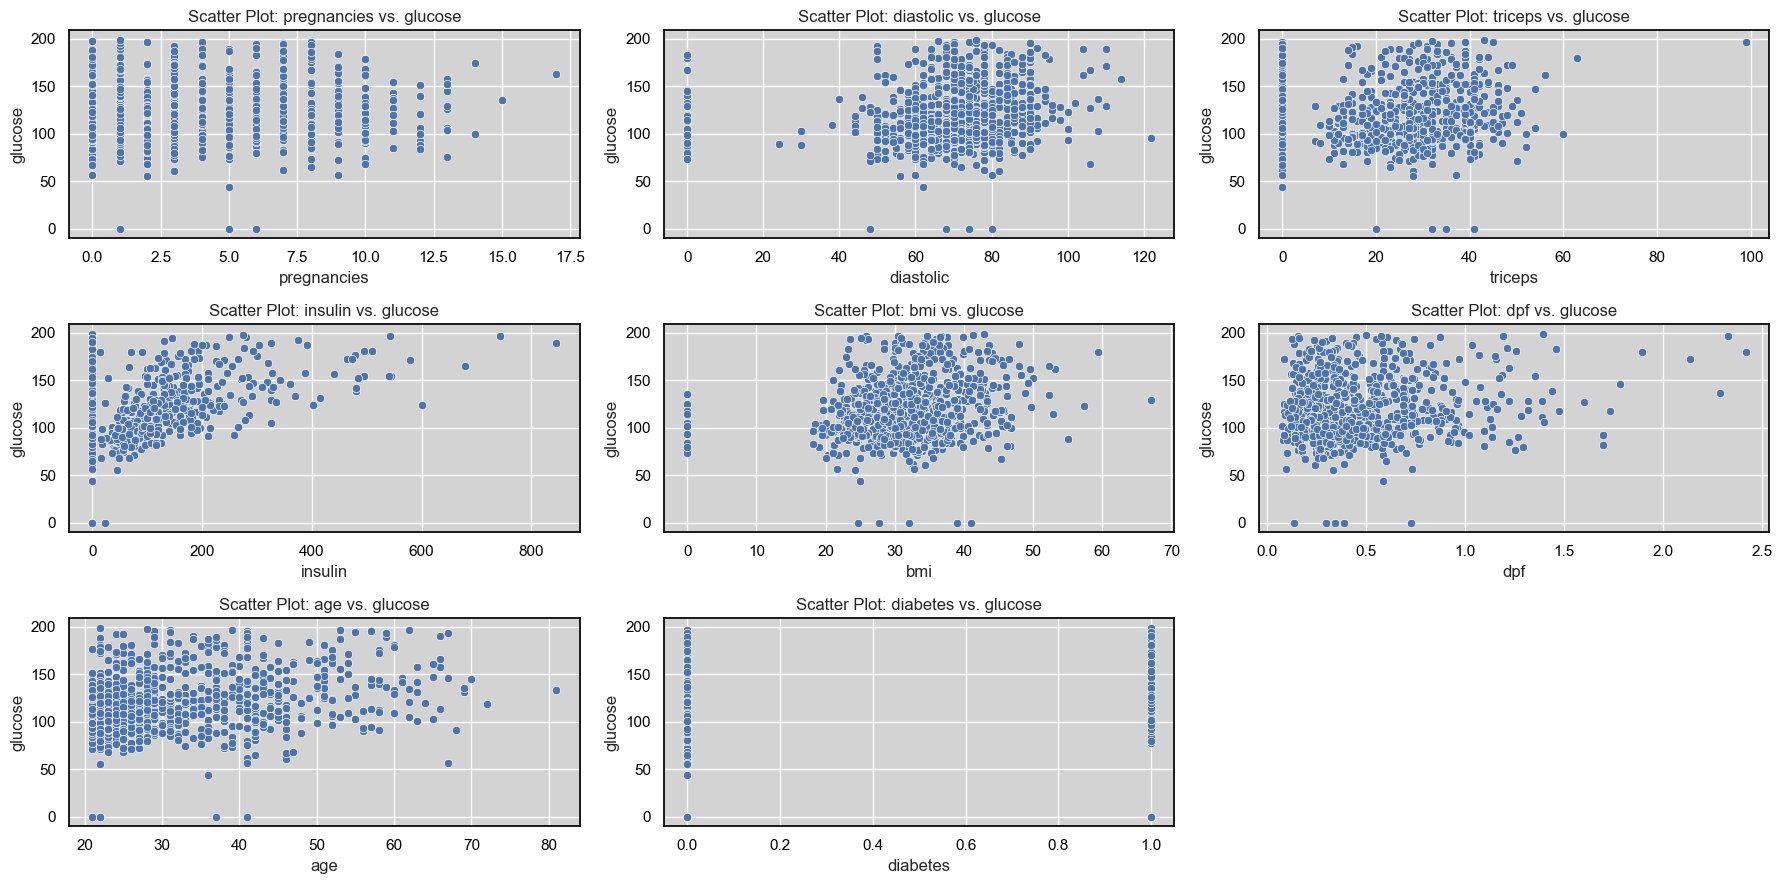

In [12]:
# Plot scatter plots
scatter_plots(dataframe=df, target_column='glucose', plots_per_row=3)

In [13]:
from toolkit import analyze_skewness_and_kurtosis

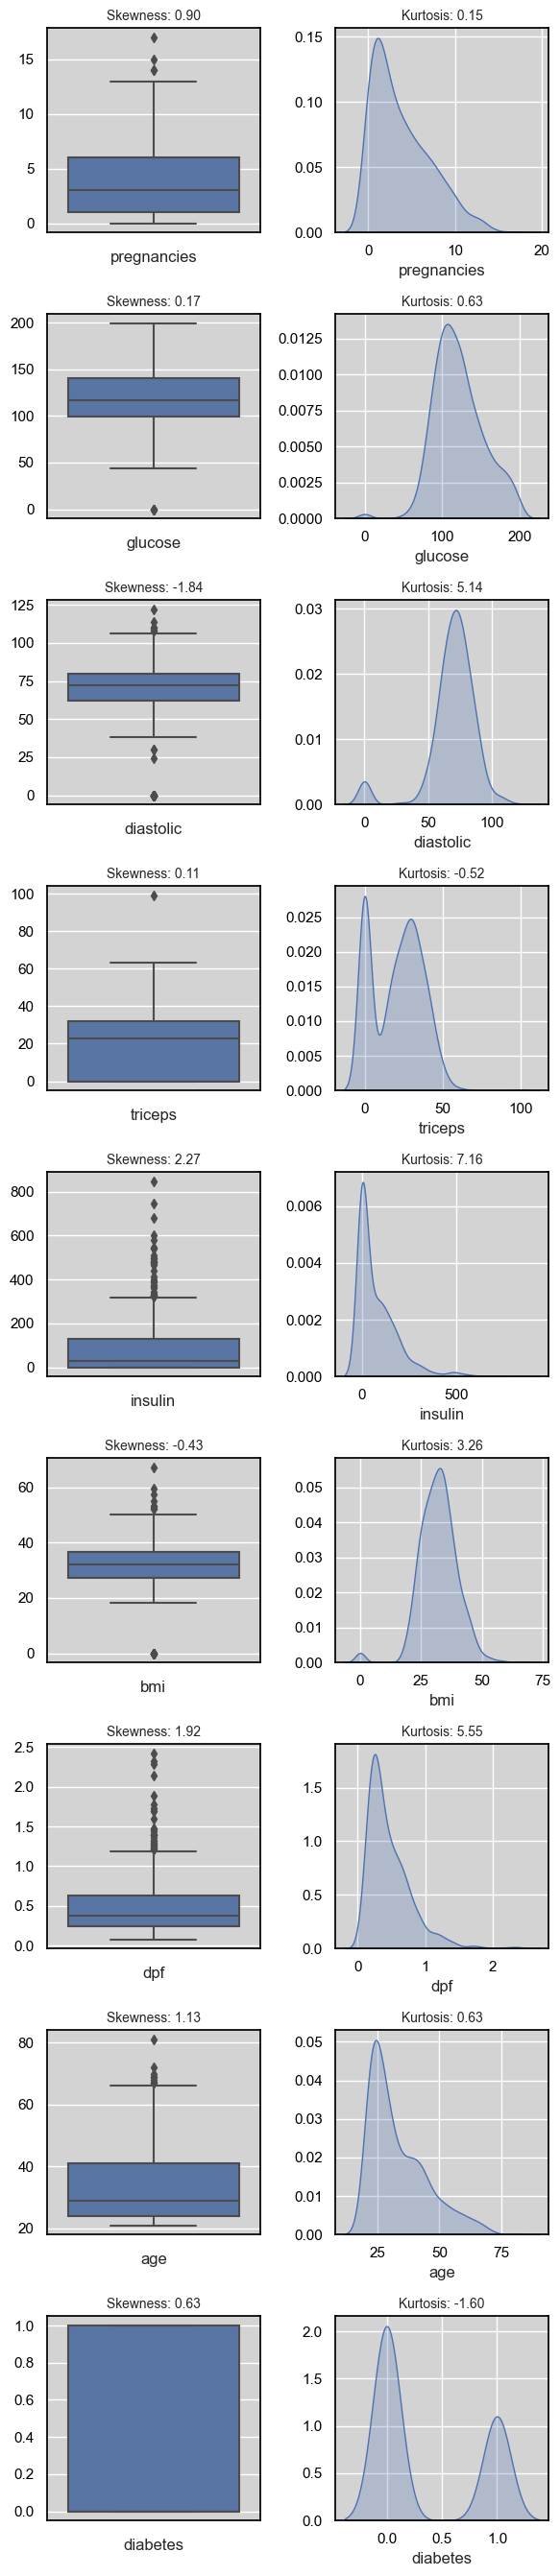

In [14]:
analyze_skewness_and_kurtosis(df)

In [15]:
from toolkit import compute_and_plot_correlation

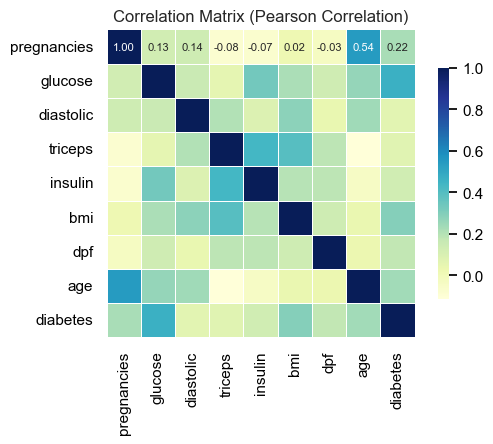

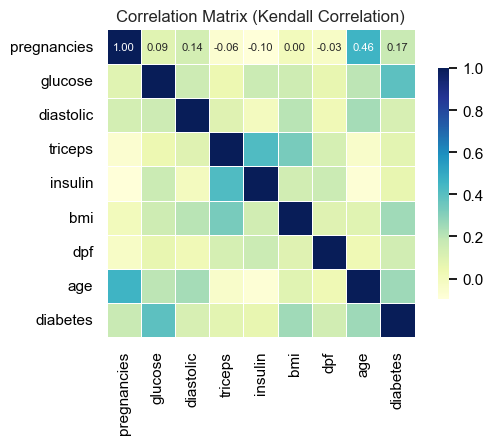

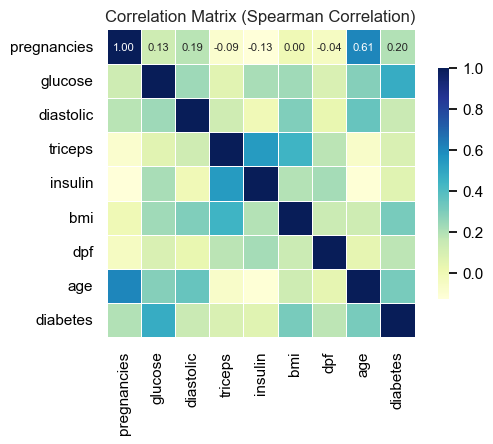

In [16]:
# Compute and plot correlation matrices for all methods
correlation_matrices = compute_and_plot_correlation(df)

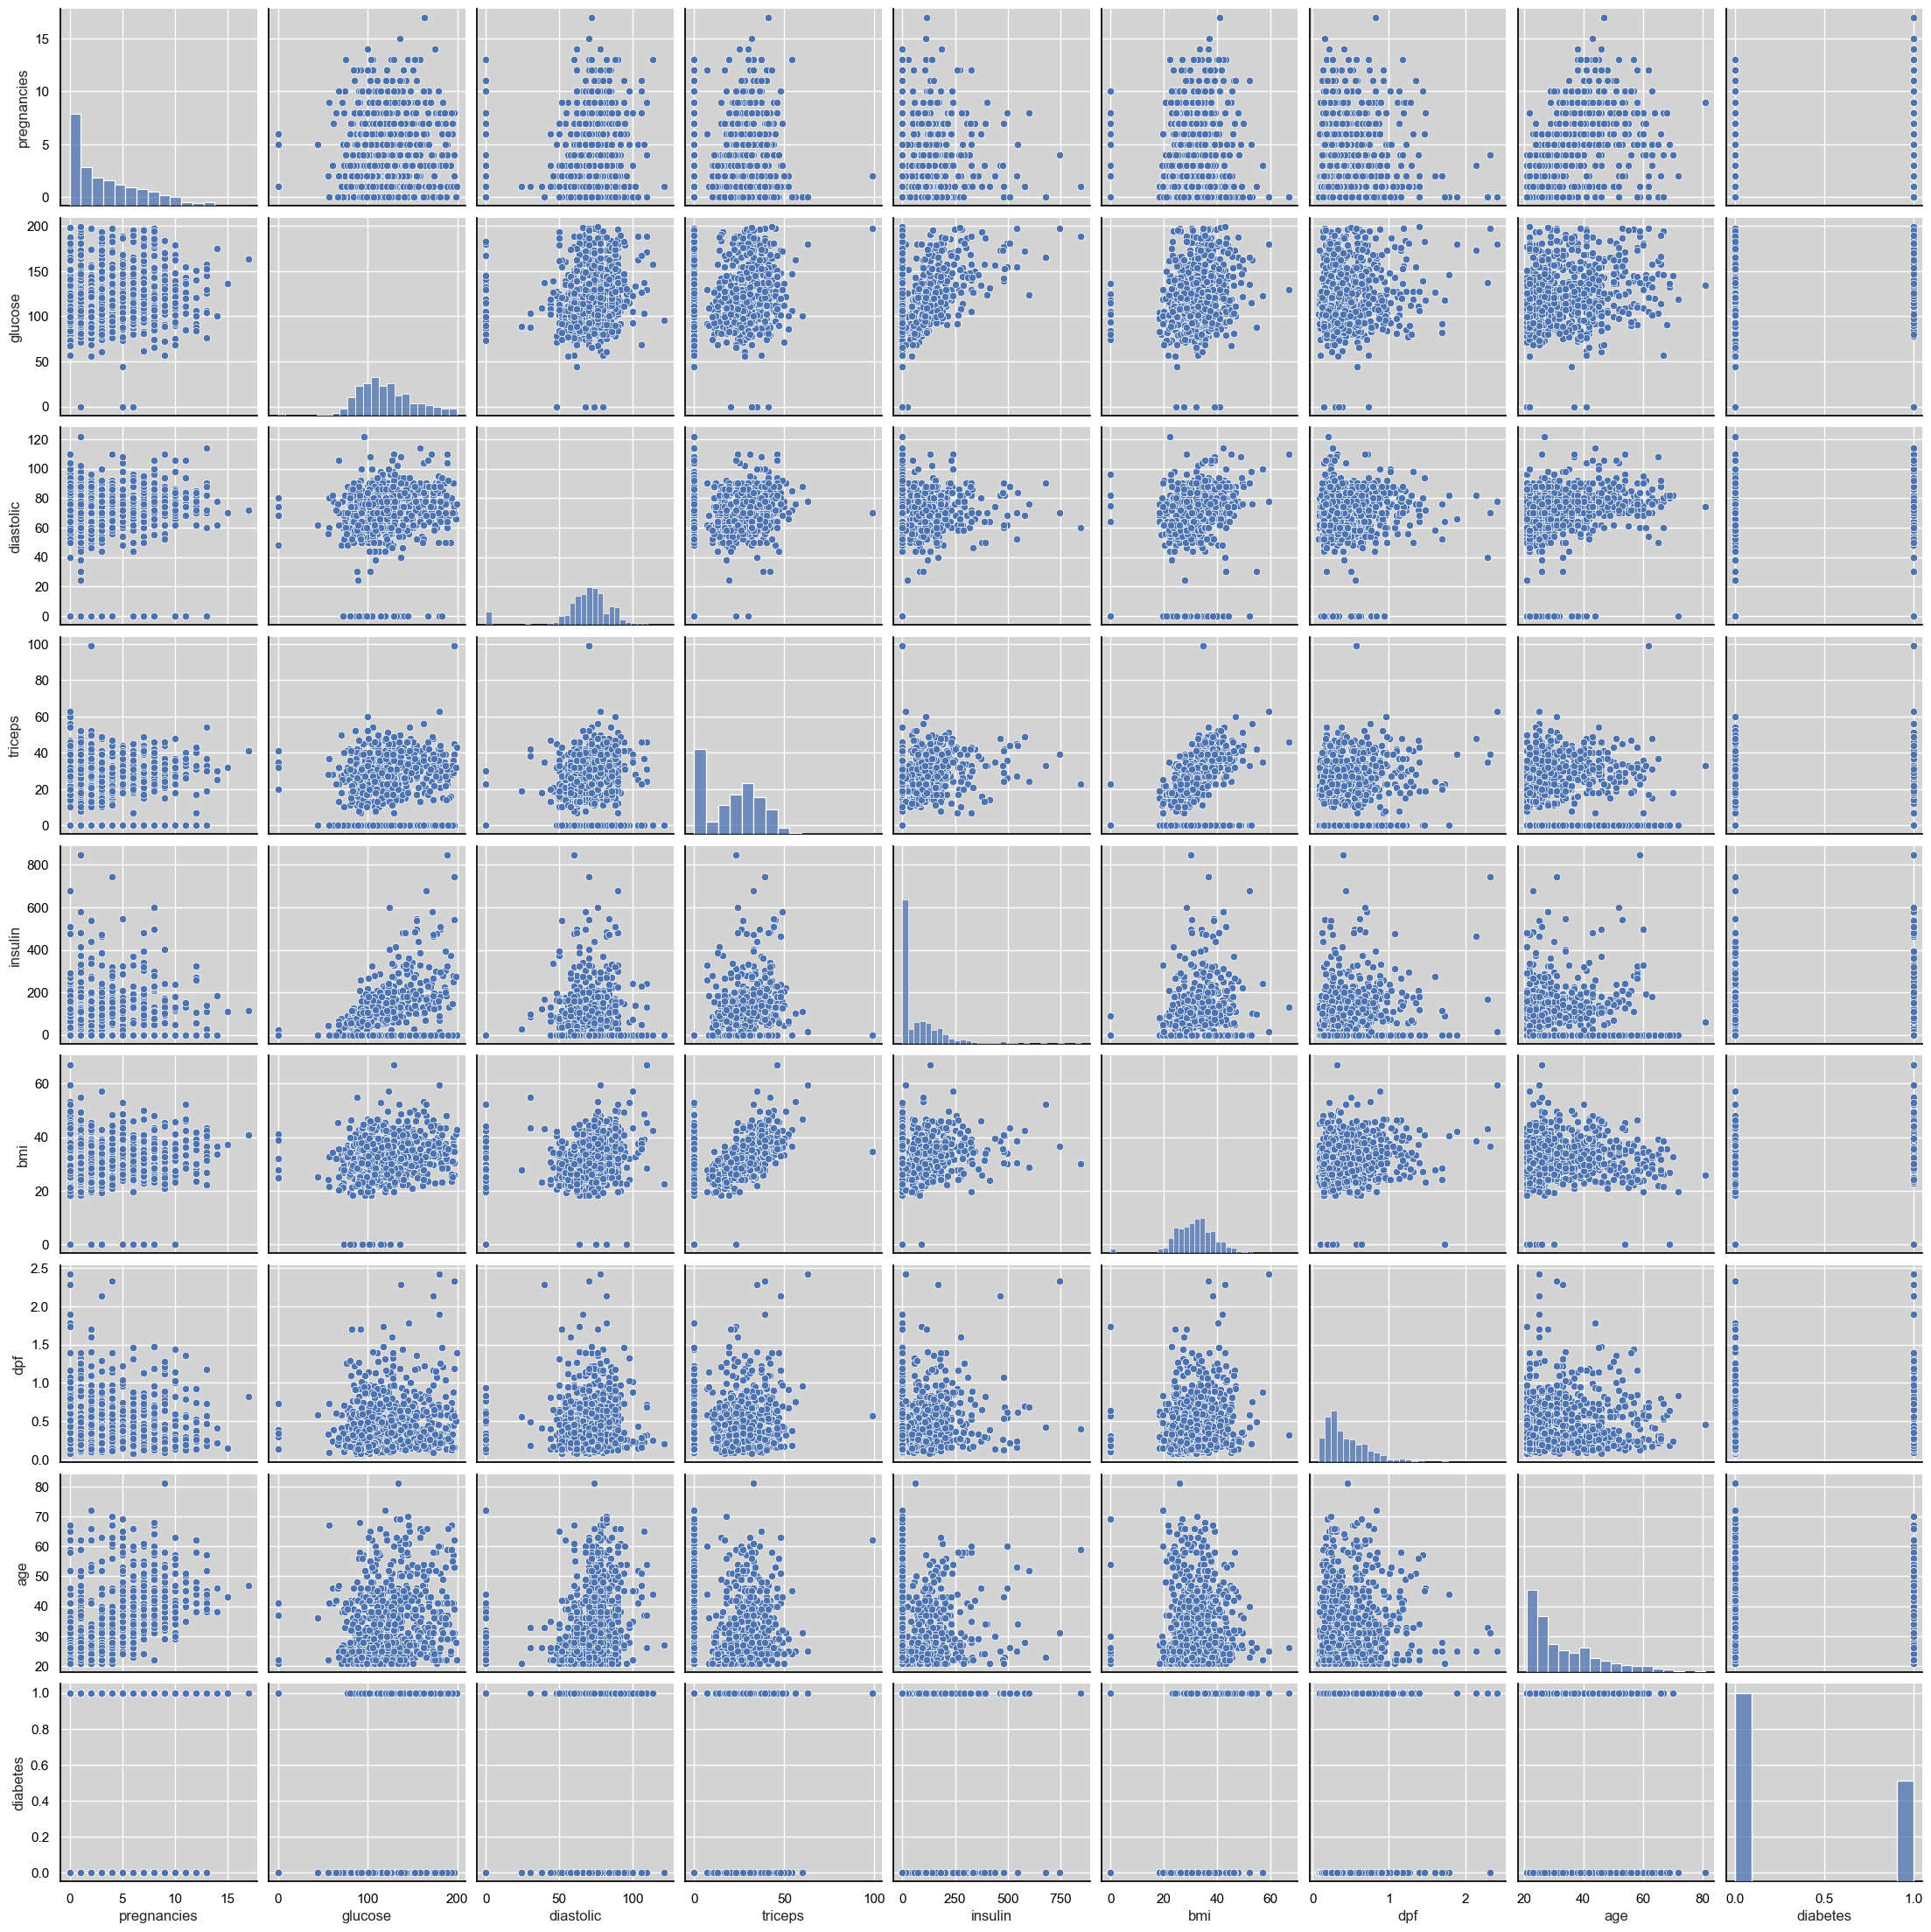

In [17]:
# Create pair plots to visualize pairwise relationships between numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])
sns.pairplot(df[numerical_features.columns])
plt.show()

## Outlier Treatment

In [18]:
from toolkit import box_plots

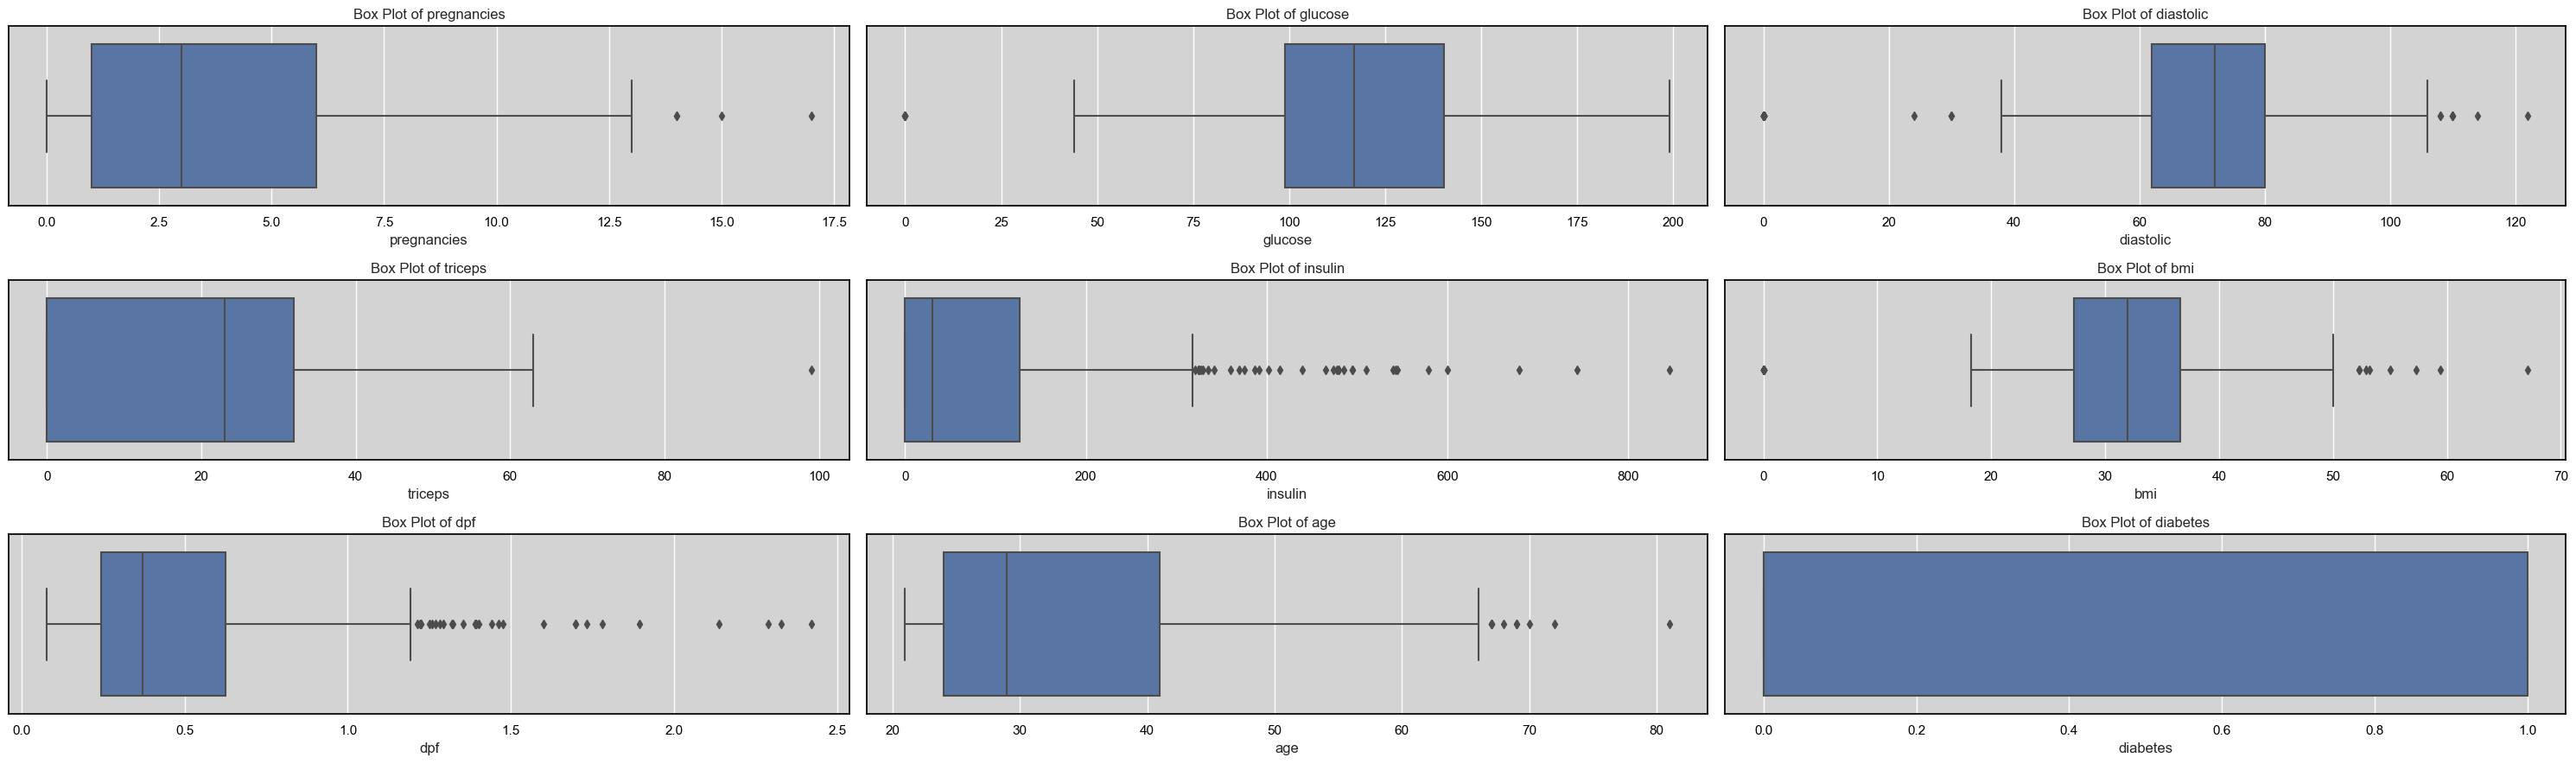

In [19]:
# Plotting
box_plots(df, plots_per_row=3)

### Outlier Detection and Treatment

In data analysis, outliers are data points that significantly differ from the majority of the data. Outliers can skew statistical analysis and model predictions. Therefore, it's essential to detect and treat outliers to ensure the accuracy of data-driven decisions. This notebook explores the concept of outliers, skewness, and kurtosis, and presents a Python code for detecting and treating outliers.

#### **What are Outliers?**

Outliers are data points that deviate significantly from the rest of the data in a dataset. They can occur due to various reasons, such as data entry errors, measurement inaccuracies, or rare events. Outliers can have a substantial impact on statistical analysis, machine learning models, and data visualization. Therefore, it's crucial to identify and address them appropriately.

#### **Skewness and Kurtosis**

Before diving into outlier detection and treatment, let's understand two important statistical concepts:

- **Skewness:** Skewness measures the asymmetry in the distribution of data. A positive skew indicates that the data's right tail is longer or fatter than the left tail, while a negative skew indicates the opposite. Skewed data can influence the presence and impact of outliers.

- **Kurtosis:** Kurtosis measures the "tailedness" or the heaviness of the tails in the data distribution. High kurtosis indicates heavy tails, which means the data has more extreme values and outliers.

#### **Approach to Treat Outliers**

To handle outliers effectively, a multi-step approach is often used:

1. **Outlier Detection:** Identify the outliers in the dataset. Two common methods for outlier detection are the Z-score method and the Interquartile Range (IQR) method.

2. **Assess Treatment Method:** Assess the most suitable outlier treatment method for each feature. The choice of treatment method can depend on the feature's distribution, skewness, and kurtosis. The available treatment methods are:
   - **Impute:** Replace outliers with the mean of non-outlying data points in the same column.
   - **Winsorize:** Cap extreme values by replacing them with the nearest non-outlying values (e.g., replace values above the 99th percentile with the 99th percentile value).
   - **Transform:** Apply mathematical transformations (e.g., log transformation) to reduce the impact of outliers.

3. **Apply Treatment:** Apply the chosen outlier treatment method to the data. This step ensures that outliers are appropriately handled while preserving the integrity of the dataset.

#### **Code for Outlier Detection and Treatment**

We'll use Python and the provided functions to demonstrate the outlier detection and treatment process. The key functions are:

- `detect_outliers`: Detect outliers in a dataset using the Z-score or IQR method.
- `assess_treatment_method`: Assess the most suitable outlier treatment method for a feature based on skewness and kurtosis.
- `treat_outliers`: Apply the chosen outlier treatment method to the data based on feature assessment.

Let's proceed with the code implementation:

In [20]:
from toolkit import detect_outliers, treat_outliers

In [21]:
# 'IQR' method
outliers_iqr = detect_outliers(data=df)

In [22]:
outliers_iqr.shape

(768, 9)

In [23]:
# Perform outlier treatment
treated_data = treat_outliers(data=df, target_feature='glucose')

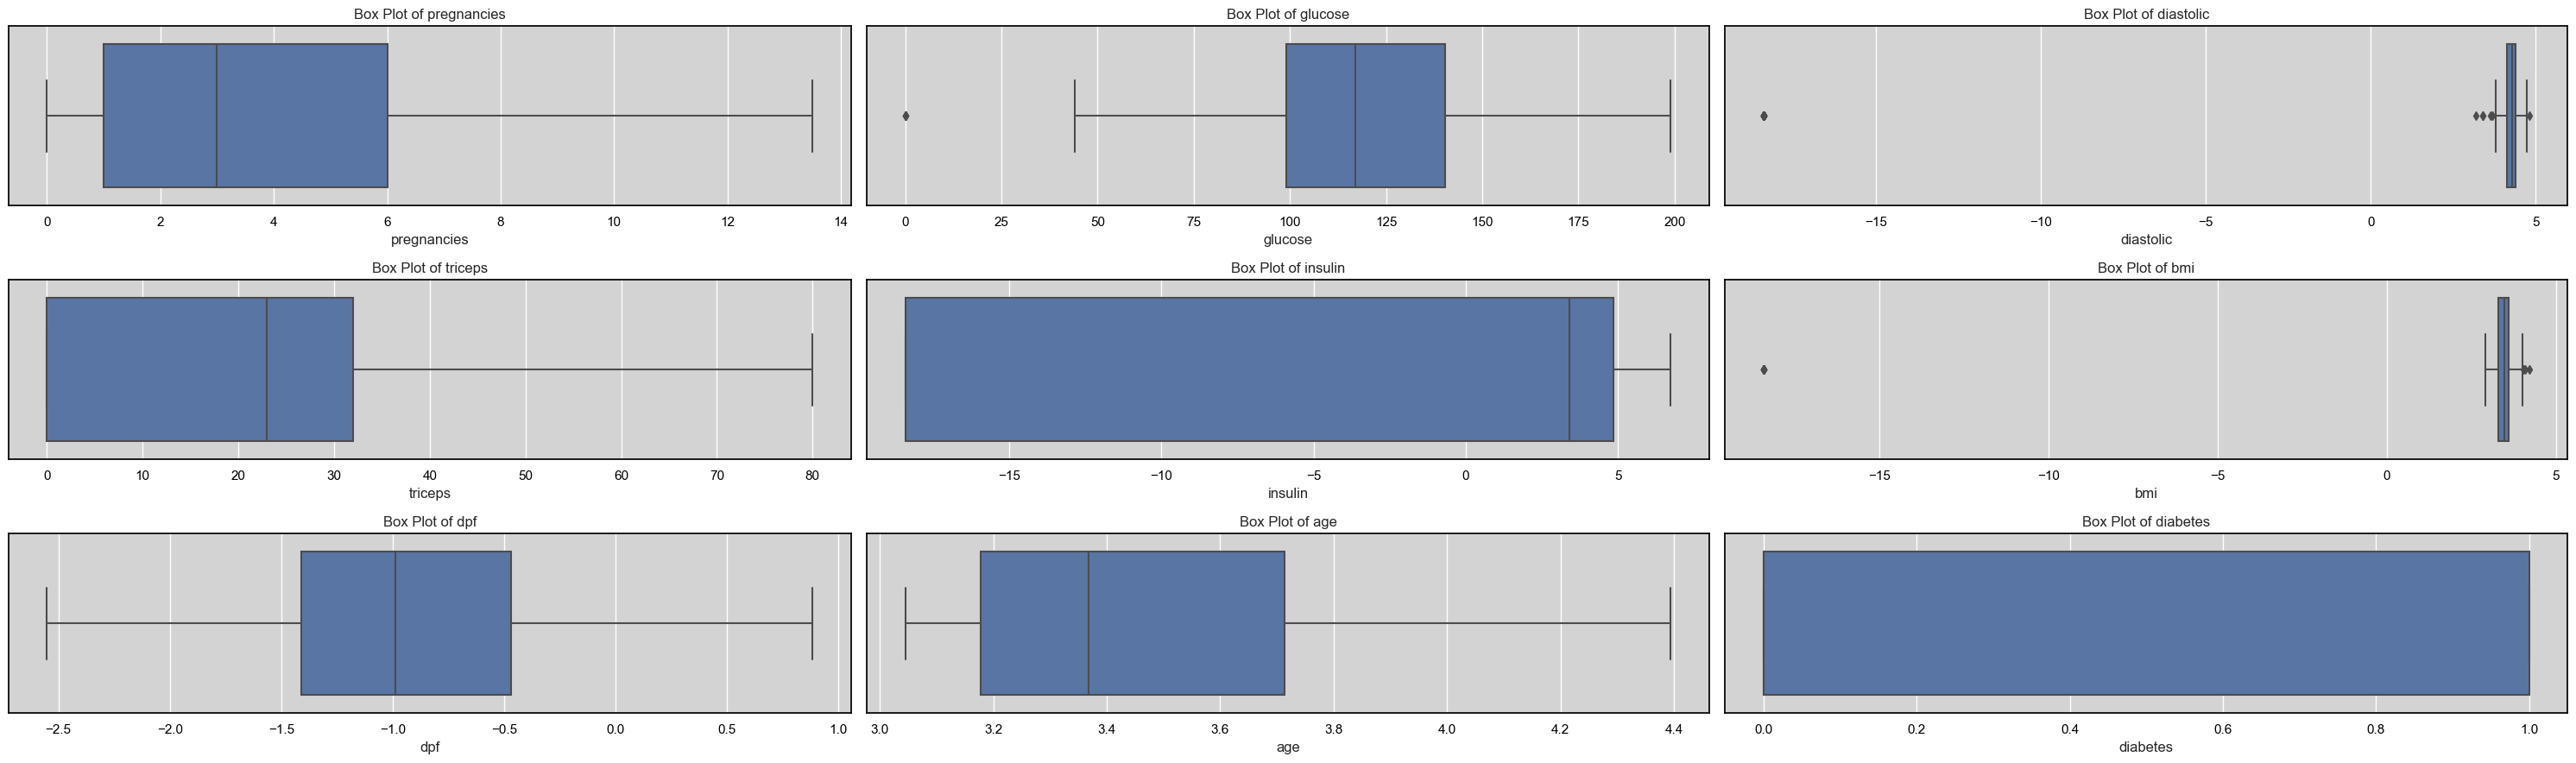

In [24]:
box_plots(treated_data, plots_per_row=3)

In [25]:
from toolkit import visualize_data_before_after_all

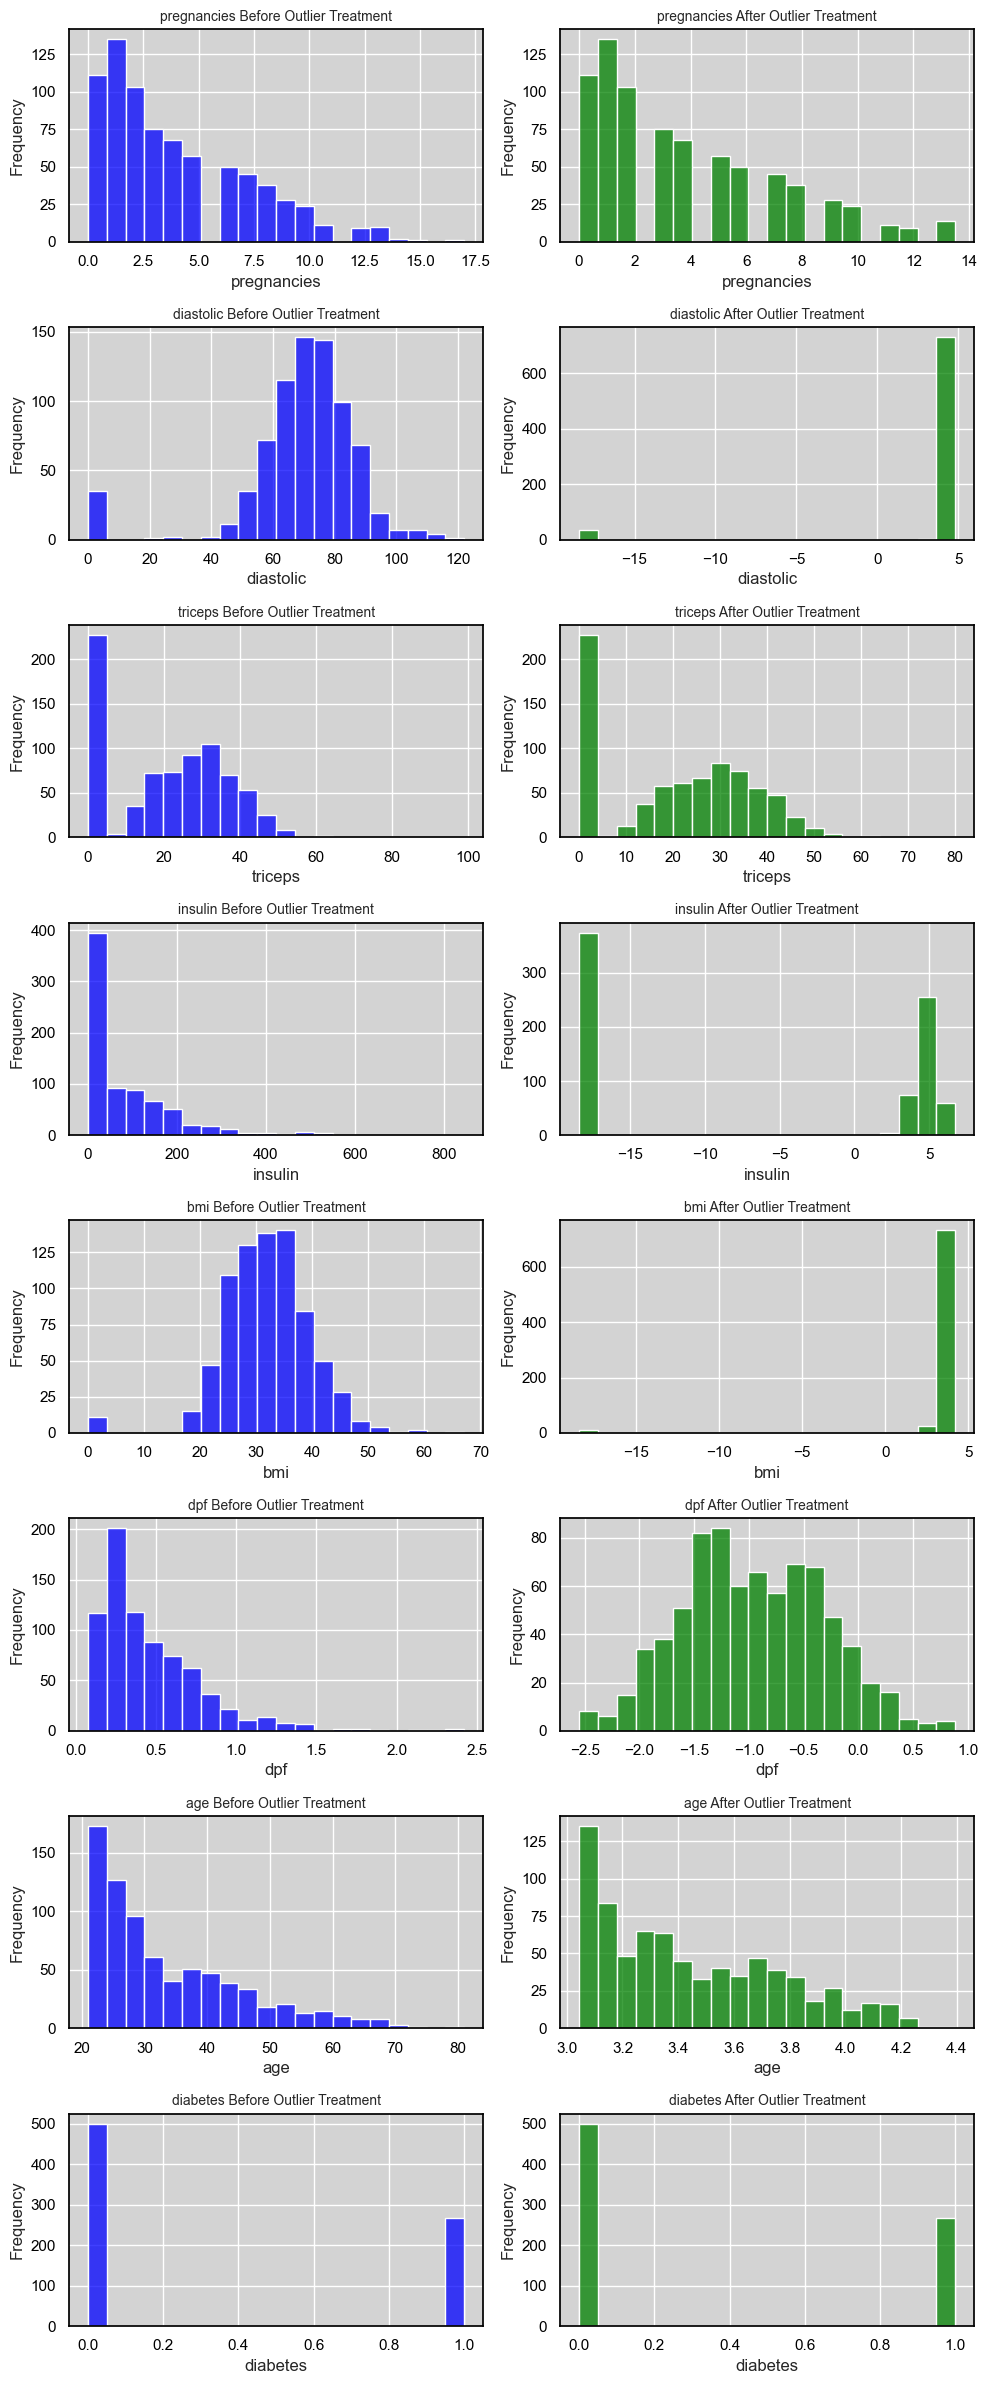

In [26]:
visualize_data_before_after_all(data_before=df, data_after=treated_data, target_feature='glucose')

#### Creating feature and target arrays

In [27]:
X = treated_data.drop('glucose', axis=1).values
y = treated_data['glucose'].values

#### Train Test Split

In [28]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Fit Model

In [29]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

#### Make Pridiction

In [30]:
y_pred = reg.predict(X_test)

#### Analyse Prediction

In [31]:
# R-Squared
reg.score(X_test, y_test)

0.1998894236423462

In [32]:
# RMSE
mean_squared_error(y_test, y_pred, squared=False)

27.822498019702703

#### Cross Validation

In [33]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)

In [34]:
reg_cv = LinearRegression()

In [35]:
cv_results = cross_val_score(reg_cv, X, y, cv=kf)
cv_results

array([0.24267408, 0.15147674, 0.30014756, 0.19854862, 0.26562159,
       0.24469434])

In [36]:
np.mean(cv_results), np.std(cv_results)

(0.23386048768246567, 0.04766515814172135)

In [37]:
np.quantile(cv_results, [0.025, 0.975])

array([0.15736073, 0.29583181])

#### Regularization

In [38]:
# Ridge
ridge_scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    ridge_scores.append(ridge.score(X_test, y_test))
ridge_scores

[0.19983200067841878,
 0.19931636069115732,
 0.19427498851022718,
 0.1500266173943643,
 0.04132482129090187]

In [39]:
# Lasso
lasso_scores = []
for alpha in [0.1, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    lasso_scores.append(lasso.score(X_test, y_test))
lasso_scores

[0.19822347759783643,
 0.17687212503632543,
 0.007364145250641219,
 -0.0007280864448084845,
 -2.3516854773975027e-05]

#### Feature Selection

In [40]:
X = treated_data.drop('glucose', axis=1).values
y = treated_data['glucose'].values
names = treated_data.drop('glucose', axis=1).columns

In [41]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

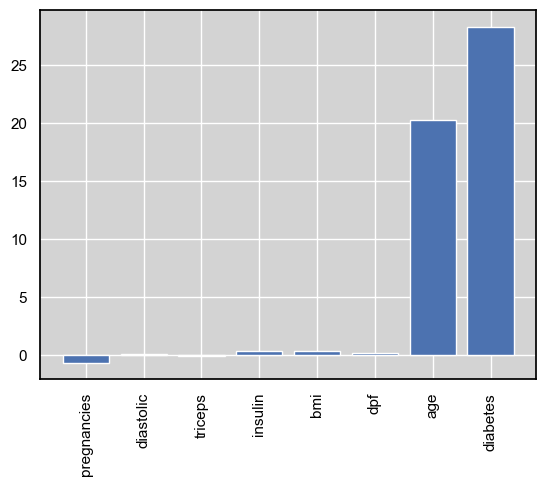

In [42]:
plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.show()